In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv("DrosophilaMelanogaster_lcc_hq.txt",sep="\t",usecols=["Uniprot_A","Uniprot_B"])

In [50]:
df.head()

,Uniprot_A,Uniprot_B
0,A0A0B4JD97,P18431
1,A0A0B4JD97,Q9VEZ3
2,A0A0B4JDC9,P91645
3,A0A0B4JDC9,Q9W0K0
4,A0A0B4JDD0,E1JHT6


In [51]:
G=nx.from_pandas_edgelist(df,"Uniprot_A","Uniprot_B",create_using=nx.DiGraph())


In [52]:
print(G)

DiGraph with 1825 nodes and 2652 edges


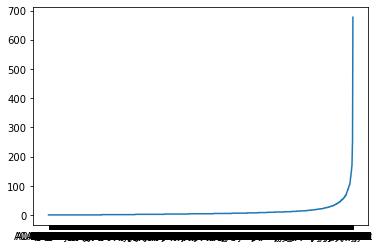

In [5]:
degrees=dict(G.degree())
order=sorted(degrees.items(),key=lambda t:t[1])
x,y=zip(*order)
plt.plot(x,y)
plt.show()

In [53]:
print(G.degree())

[('A0A0B4JD97', 2), ('P18431', 101), ('Q9VEZ3', 2), ('A0A0B4JDC9', 2), ('P91645', 1), ('Q9W0K0', 6), ('A0A0B4JDD0', 1), ('E1JHT6', 121), ('A0A0B4K620', 2), ('P34082', 197), ('A0A0B4K657', 1), ('A0A0B4K682', 2), ('Q9V9Y9', 3), ('A0A0B4K6M2', 1), ('A0A0B4K6N4', 1), ('Q7KTJ7', 1), ('A0A0B4K6W9', 1), ('P25158', 10), ('A0A0B4K765', 6), ('Q94517', 18), ('Q9VMJ7', 7), ('Q9VQ58', 1), ('Q9VWG2', 1), ('Q9VYI2', 1), ('Q9W410', 3), ('A0A0B4K774', 4), ('F2FB81', 5), ('P55162', 3), ('Q8MLQ0', 4), ('Q9VAT0', 6), ('A0A0B4K7J2', 3), ('Q9U1H9', 5), ('Q9V3H8', 5), ('A0A0B4K7J3', 5), ('A0A0B4KG59', 2), ('P07713', 6), ('P27091', 2), ('Q5U110', 2), ('Q9VMT1', 6), ('A0A0B4K7J4', 1), ('Q7KT06', 2), ('A0A0B4K7L3', 2), ('A0A0B4K7N1', 1), ('X2J8L2', 1), ('A0A0B4K7Q6', 3), ('Q9VKB2', 1), ('Q9XYM0', 1), ('A0A0B4K823', 6), ('P24014', 4), ('Q24568', 1), ('Q9NFU0', 14), ('Q9VPU1', 6), ('A0A0B4KEN4', 6), ('A1Z6W3', 7), ('P31007', 10), ('P51140', 7), ('Q7JUF2', 2), ('A0A0B4KER0', 4), ('A8JRE3', 3), ('Q9VCU6', 7), ('Q9V

<BarContainer object of 119 artists>

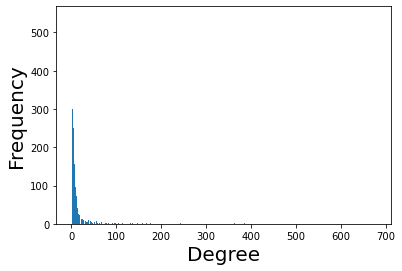

In [19]:
from collections import Counter
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plot_x = list(set(degree_sequence))
plot_y = [degree_counts.get(x,0) for x in plot_x]
plt.bar(plot_x, plot_y)


In [23]:
print(degree_counts)

Counter({1: 541, 2: 344, 3: 299, 4: 251, 5: 249, 6: 187, 7: 156, 8: 110, 9: 95, 11: 94, 10: 81, 12: 73, 15: 55, 13: 50, 14: 42, 17: 33, 16: 26, 21: 24, 19: 24, 22: 22, 18: 22, 26: 19, 20: 17, 23: 13, 25: 12, 31: 11, 30: 10, 27: 10, 33: 10, 38: 9, 29: 9, 24: 9, 32: 8, 43: 8, 56: 7, 28: 7, 37: 7, 52: 6, 45: 6, 36: 6, 69: 5, 67: 5, 51: 5, 40: 5, 53: 5, 57: 5, 34: 4, 49: 4, 41: 4, 46: 4, 42: 4, 35: 3, 63: 3, 86: 3, 91: 3, 102: 3, 105: 3, 47: 3, 61: 3, 62: 3, 78: 2, 106: 2, 132: 2, 44: 2, 88: 2, 59: 2, 95: 2, 77: 2, 68: 2, 73: 2, 79: 1, 477: 1, 76: 1, 222: 1, 158: 1, 385: 1, 83: 1, 176: 1, 139: 1, 39: 1, 142: 1, 166: 1, 117: 1, 144: 1, 114: 1, 150: 1, 248: 1, 677: 1, 93: 1, 81: 1, 157: 1, 97: 1, 147: 1, 167: 1, 211: 1, 243: 1, 198: 1, 100: 1, 108: 1, 136: 1, 363: 1, 92: 1, 164: 1, 55: 1, 60: 1, 146: 1, 113: 1, 84: 1, 129: 1, 82: 1, 64: 1, 58: 1, 71: 1, 98: 1, 48: 1, 80: 1, 110: 1, 124: 1, 96: 1})


In [7]:
import math
def plot_degree_dist(G):
    
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
   
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
   
    
    plt.figure()
    plt.bar(values, P_k)
    plt.xlabel("k",fontsize=20)
    plt.ylabel("p(k)", fontsize=20)
    plt.title("Degree Distribution", fontsize=20)
    
    plt.show()
    plt.figure()
    plt.loglog(values, P_k, "bo")
    plt.xlabel("k", fontsize=20)
    plt.ylabel("log p(k)", fontsize=20)
    plt.show()

    

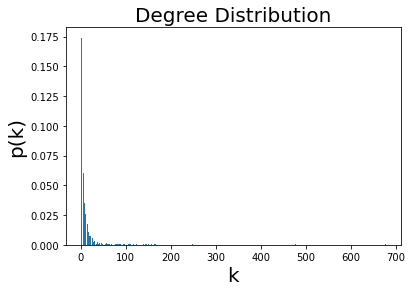

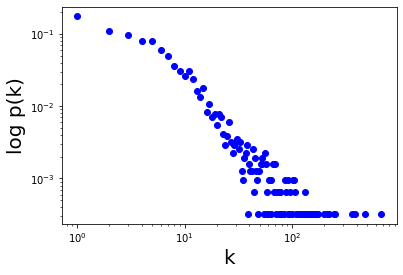

In [11]:
plot_degree_dist(G)

In [31]:
ll=len(order)
f=int(ll*0.05)

In [32]:
f

155

In [45]:
bb=[]

In [46]:
for x in range (len(order)-f,len(order)):
    bb.append(order[x][0])

In [47]:
bb

['P0A968',
 'P0AED5',
 'P0A9A6',
 'P0A9B2',
 'P0AD61',
 'P0A6Q3',
 'P0A847',
 'P0A9X9',
 'P0AE08',
 'P68066',
 'P0AA43',
 'P0A901',
 'P0A8E6',
 'P0AFP6',
 'P0A8I5',
 'P14081',
 'P0A7A9',
 'P0A9W0',
 'P23830',
 'P0AFF6',
 'P0A8G0',
 'P0A7M6',
 'P0C018',
 'P0A6H5',
 'P0AC53',
 'P0A6B7',
 'P69913',
 'P05055',
 'P09546',
 'P0A9K6',
 'P42184',
 'P0AES4',
 'P0AEM0',
 'P0A8M3',
 'P08245',
 'P36659',
 'P0ABU7',
 'P77188',
 'P0A715',
 'P75829',
 'P09372',
 'P76104',
 'P75864',
 'P0A6A8',
 'P0C054',
 'P21513',
 'P0A843',
 'P0A6W5',
 'P0A6M8',
 'P28043',
 'P0A705',
 'P0A972',
 'P0A9A9',
 'P0ADY3',
 'P0A988',
 'P0A7E9',
 'P0A8E5',
 'P0ADK8',
 'P0A7J7',
 'P0A7L3',
 'P0A776',
 'P0A8N5',
 'P0A7N9',
 'P0A6Z3',
 'P0A6P9',
 'P0A9K3',
 'P09373',
 'P22523',
 'P0AFG0',
 'P0AGJ6',
 'P06612',
 'P21645',
 'P0A7Y8',
 'P0A707',
 'P0AGK4',
 'P0A6G7',
 'P0AAS7',
 'P0AG24',
 'P0DP90',
 'P0ADY7',
 'P15288',
 'P67910',
 'P0ACF8',
 'P0AG30',
 'P10443',
 'P0A7J3',
 'P21499',
 'P0AA39',
 'P0ABT2',
 'P37751',
 'Q8VNN2',

In [48]:
len(bb)

155